## Chocolate

Number of tuples: 1793
Unique company names: 416
Reviews in 2013: 0
Missing values in BeanType: 0


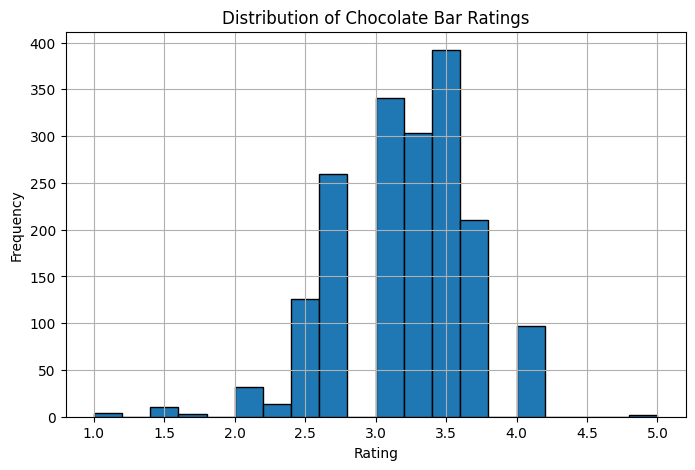

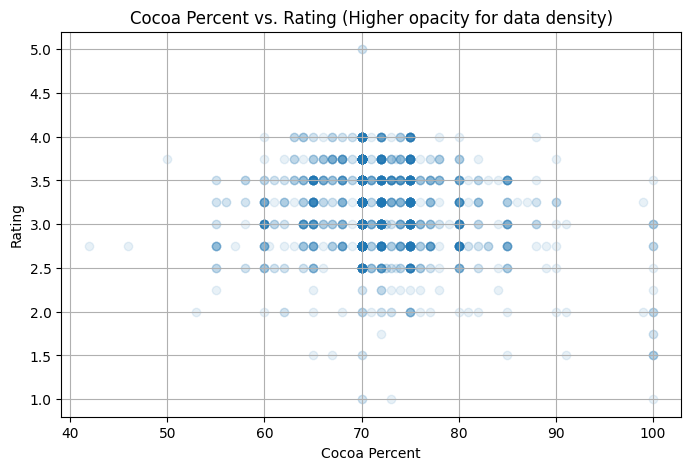

Normalized Rating values:
    Rating  Rating_Normalized
0    3.75           1.181356
1    2.75          -0.912734
2    3.00          -0.389211
3    3.50           0.657834
4    3.50           0.657834
Companies by average score (descending):
 Company
Tobago Estate (Pralus)                  4.000000
Ocelot                                  3.875000
Heirloom Cacao Preservation (Zokoko)    3.875000
Amedei                                  3.846154
Matale                                  3.812500
Patric                                  3.791667
Idilio (Felchlin)                       3.775000
Un Dimanche A Paris                     3.750000
Chocola'te                              3.750000
Obolo                                   3.750000
Name: Rating, dtype: float64
Encoded company names (example):
     Company  Company_Encoded
0  A. Morin                0
1  A. Morin                0
2  A. Morin                0
3  A. Morin                0
4  A. Morin                0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler


file_path = r"C:\Users\justino\Desktop\flavours_of_cacau.csv"
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"File '{file_path}' not found. Please check the path or download the file.")
    exit()


df.dropna(inplace=True)


print("Number of tuples:", df.shape[0])
print("Unique company names:", df["Company"].nunique())
print("Reviews in 2013:", df[df["Year"] == 2013].shape[0])
print("Missing values in BeanType:", df["BeanType"].isnull().sum())


plt.figure(figsize=(8, 5))
df["Rating"].hist(bins=20, edgecolor="black")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Chocolate Bar Ratings")
plt.grid(True)
plt.show()


df["Percent.Cocoa"] = df["Percent.Cocoa"].str.rstrip("%").astype(float)  # Convert to numerical
plt.figure(figsize=(8, 5))
plt.scatter(df["Percent.Cocoa"], df["Rating"], alpha=0.1)
plt.xlabel("Cocoa Percent")
plt.ylabel("Rating")
plt.title("Cocoa Percent vs. Rating (Higher opacity for data density)")
plt.grid(True)
plt.show()


scaler = StandardScaler()  # Standardize for better visualization
df["Rating_Normalized"] = scaler.fit_transform(df[["Rating"]])
print("Normalized Rating values:\n", df[["Rating", "Rating_Normalized"]].head())


company_avg_score = df.groupby("Company")["Rating"].mean().sort_values(ascending=False)
print("Companies by average score (descending):\n", company_avg_score.head(10))  # Top 10


le_company = LabelEncoder()
df["Company_Encoded"] = le_company.fit_transform(df["Company"])



print("Encoded company names (example):\n", df[["Company", "Company_Encoded"]].head())

